<a href="https://colab.research.google.com/github/legendary-beast/Python-Programs/blob/main/Vheical_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns


In [32]:
df = pd.read_csv('/content/CARDETAILSFROMCARDEKHO.csv')

In [33]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [34]:
# df.duplicated().sum()
# df.drop_duplicates(inplace=True)
# df.duplicated().sum()


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])

df = df.set_index('name')

df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Maruti 800 AC,2007,60000,70000,4,1,1,0
Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
Datsun RediGO T Option,2017,250000,46000,4,1,1,0
Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [37]:
from sklearn.model_selection import train_test_split
x = df.drop('selling_price', axis=1)
y = df['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
model.score(x_test, y_test)

0.3939008529340018

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [41]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.39390085293400123

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
preprocessing_pipeline = Pipeline([
                                   ('imputer', SimpleImputer()),
                                   ('poly_feats', PolynomialFeatures()),
                                   ('std_scaler', StandardScaler())])

In [43]:
preprocessing_pipeline.fit(x_train)
X_processed = preprocessing_pipeline.transform(x_train)

In [44]:
# def __init__(*, missing_values=np.nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False, keep_empty_features=False)
# def __init__(degree=2, *, interaction_only=False, include_bias=True, order='C')
# def __init__(*, copy=True, with_mean=True, with_std=True)
model = Pipeline([
               ('imputer', SimpleImputer()),
               ('poly_feats', PolynomialFeatures()),
               ('std_scaler', StandardScaler()),
               ('linear_regression', LinearRegression())])

In [45]:
model.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('poly_feats', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [46]:
model.predict(x_test[:3])

array([[0.02803122],
       [0.06051962],
       [0.01480268]])

In [47]:
model = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])


In [48]:
model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [49]:
model.score(x_test, y_test)

0.3939008529340011

In [50]:
model.score(x_train,y_train)

0.46088518994722527

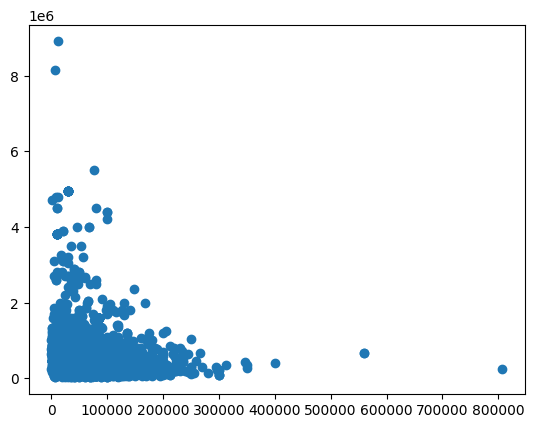

In [51]:
import matplotlib.pyplot as plt

plt.scatter(x = x['km_driven'],y = y)